In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import datetime
import math
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose

from google.colab import drive
drive.mount('/content/drive')

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [104]:
atcrime = 'drive/MyDrive/datathon/Copy of at_by_day.csv'
dccrime = 'drive/MyDrive/datathon/Copy of dc_by_day.csv'
nycrime = 'drive/MyDrive/datathon/Copy of ny_by_day.csv'

at_crime = pd.read_csv(atcrime, sep = '\t', index_col=None)
dc_crime = pd.read_csv(dccrime, sep = '\t', index_col=None)
ny_crime = pd.read_csv(nycrime, sep = '\t', index_col=None)

Graphs

In [105]:
at_crime = at_crime.drop('Unnamed: 0', 1)
at_crime['Occurred Date'] = pd.to_datetime(at_crime['Occurred Date'])
at_crime = at_crime.rename({'Occurred Date': 'date'}, axis=1)
at_crime = at_crime.set_index('date')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  """Entry point for launching an IPython kernel.


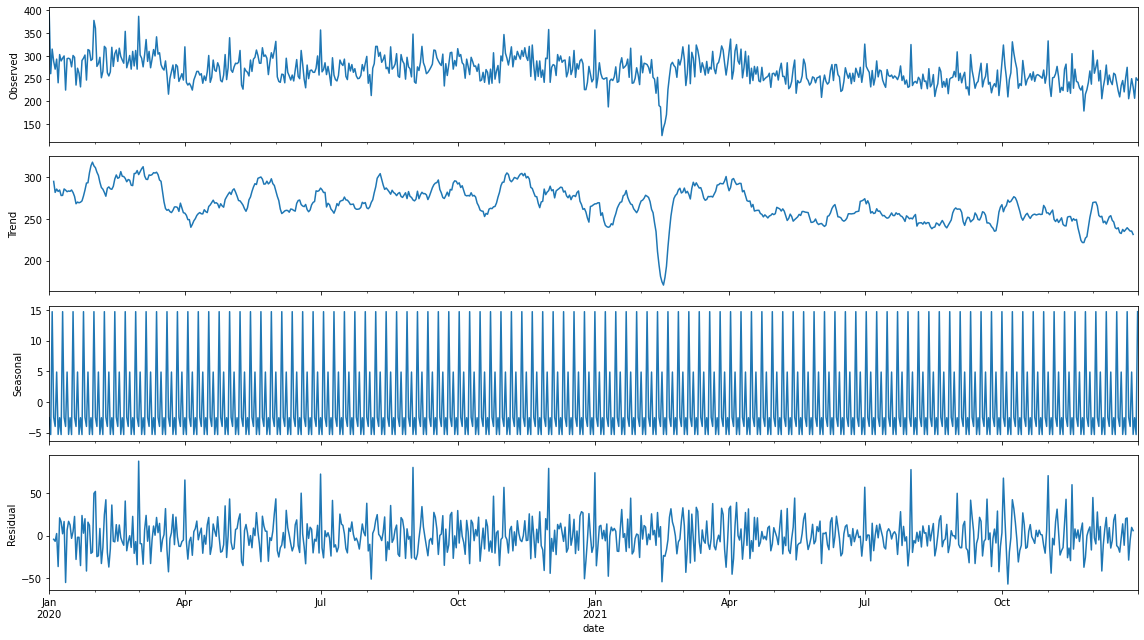

In [107]:
at_crime = at_crime.asfreq('D')
at_result = seasonal_decompose(at_crime, model='additive')
at_fig = at_result.plot()
# Tight layout to realign things
at_fig.tight_layout()
plt.rcParams["figure.figsize"] = (16,9)
plt.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  """Entry point for launching an IPython kernel.


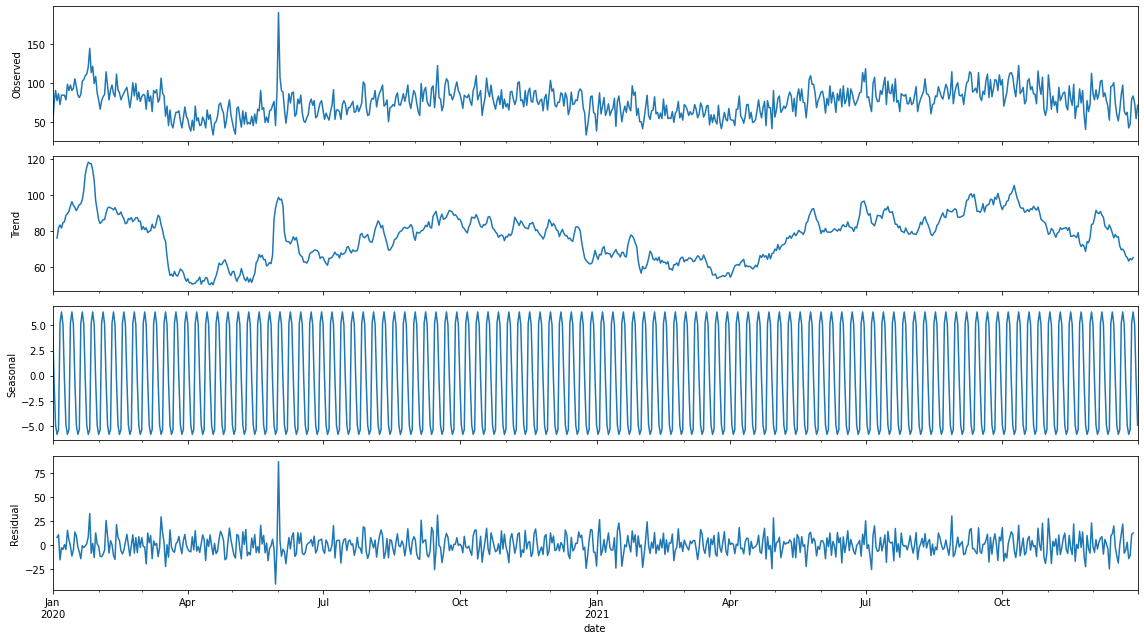

In [ ]:
dc_crime = dc_crime.drop('Unnamed: 0', 1)
dc_crime['REPORT_DAT'] = pd.to_datetime(dc_crime['REPORT_DAT'])
dc_crime = dc_crime.rename({'REPORT_DAT': 'date'}, axis=1)
dc_crime = dc_crime.set_index('date')

dc_crime = dc_crime.asfreq('D')
dc_result = seasonal_decompose(dc_crime, model='additive')
dc_fig = dc_result.plot()
dc_fig.set_size_inches((16, 9))
# Tight layout to realign things
dc_fig.tight_layout()
plt.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  """Entry point for launching an IPython kernel.


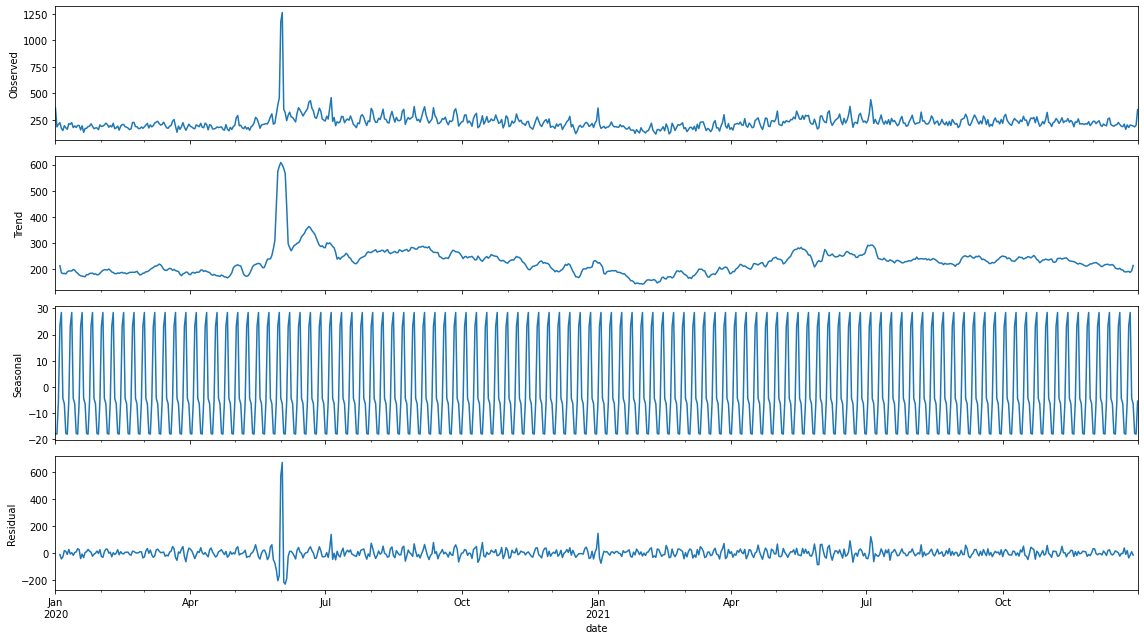

In [ ]:
ny_crime = ny_crime.drop('Unnamed: 0', 1)
ny_crime['INCIDENT_DATE'] = pd.to_datetime(ny_crime['INCIDENT_DATE'])
ny_crime = ny_crime.rename({'INCIDENT_DATE': 'date'}, axis=1)
ny_crime = ny_crime.set_index('date')

ny_crime = ny_crime.asfreq('D')
ny_result = seasonal_decompose(ny_crime, model='additive')
ny_fig = ny_result.plot()
#dc_fig.set_size_inches((30, 9))
# Tight layout to realign things
dc_fig.tight_layout()
plt.rcParams["figure.figsize"] = (16,9)
plt.show()

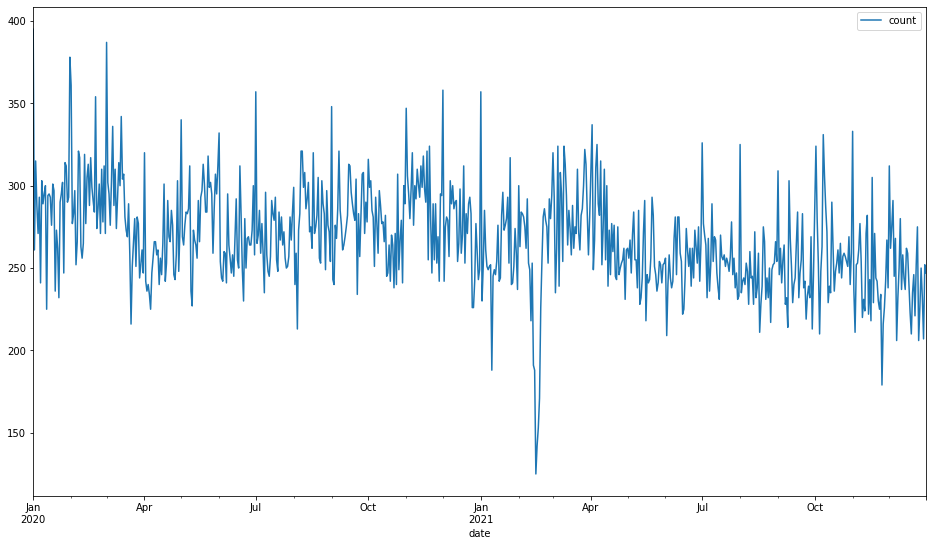

In [ ]:
at_crime.plot()
plt.rcParams["figure.figsize"] = (16,9)

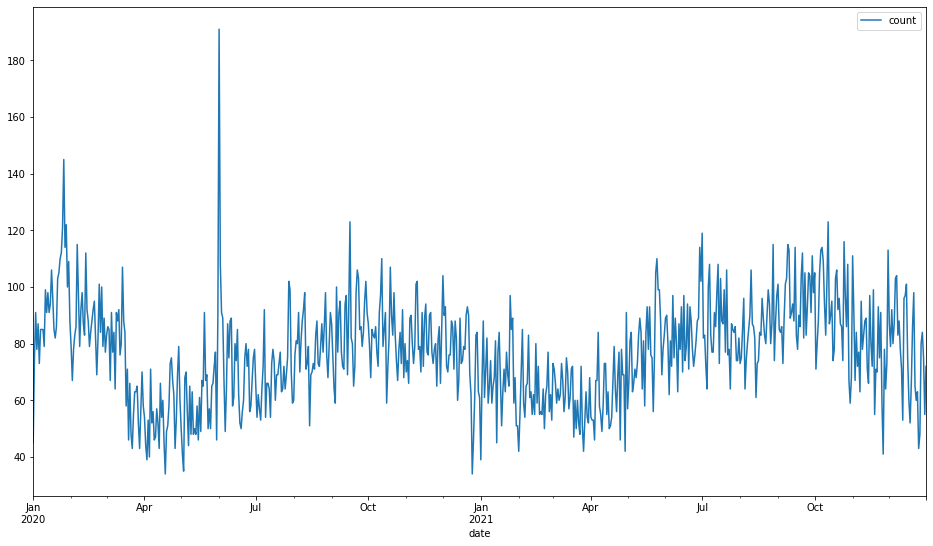

In [ ]:
dc_crime.plot()

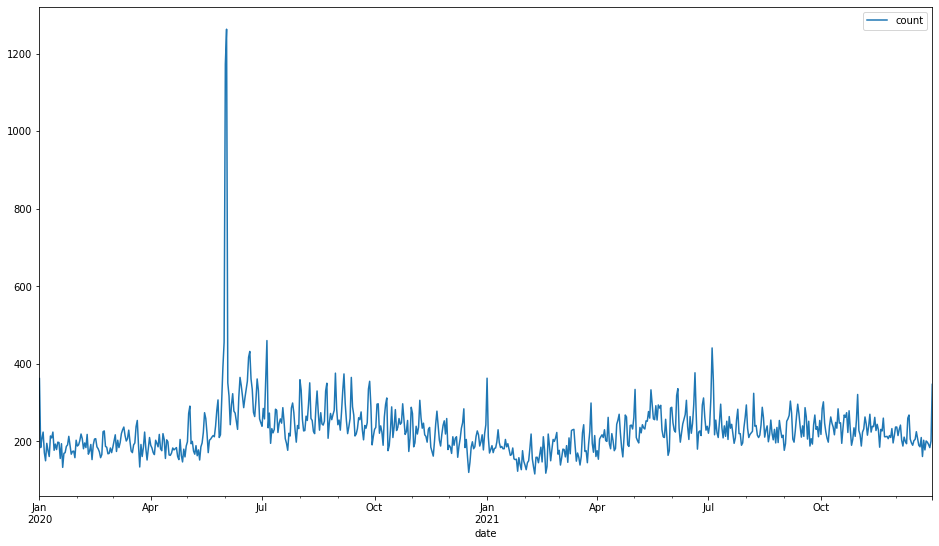

In [ ]:
ny_crime.plot()

Correlation

In [59]:
dc_feature = 'drive/MyDrive/datathon/Copy of feature_dc.csv'
dc_data = pd.read_csv(dc_feature)

In [60]:
dc_data = dc_data[dc_data['crime_count'].notna()]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


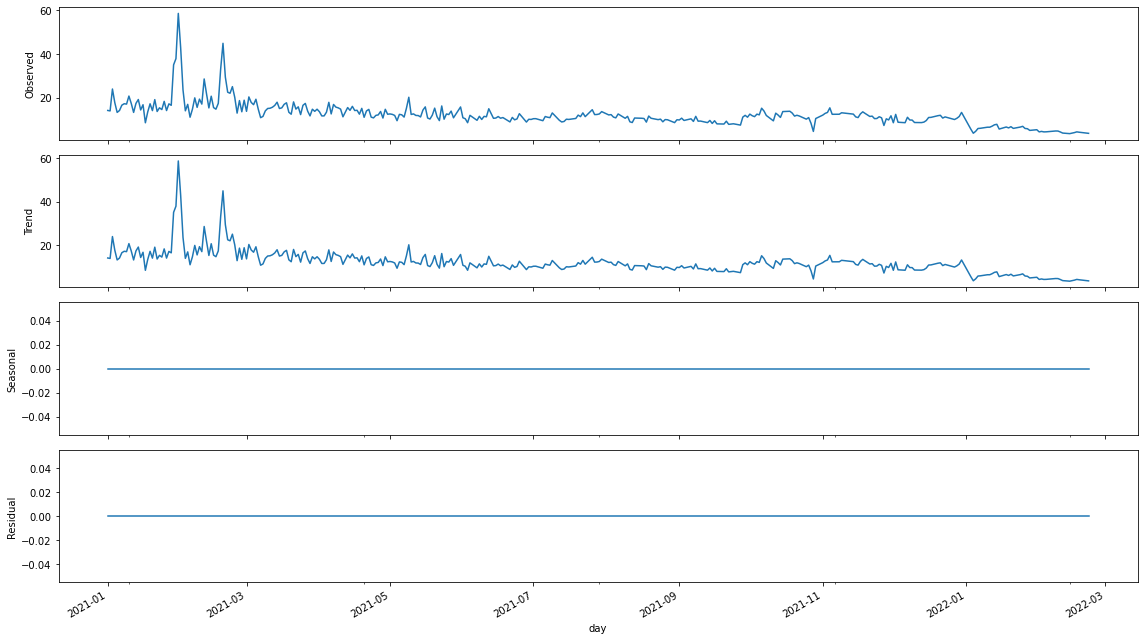

In [62]:
dc_res_time = dc_data[["day", "311_day_till_fix"]]
dc_res_time['day'] = pd.to_datetime(dc_res_time['day'])
dc_res_time = dc_res_time.set_index('day')
# dc_res_time = dc_res_time[dc_res_time['311_day_till_fix'].notna()]

dc_res_time_result = seasonal_decompose(dc_res_time, model='additive', freq = 1)
dc_res_time_fig = dc_res_time_result.plot()
# Tight layout to realign things
dc_res_time_fig.tight_layout()
plt.rcParams["figure.figsize"] = (16,9)
plt.show()

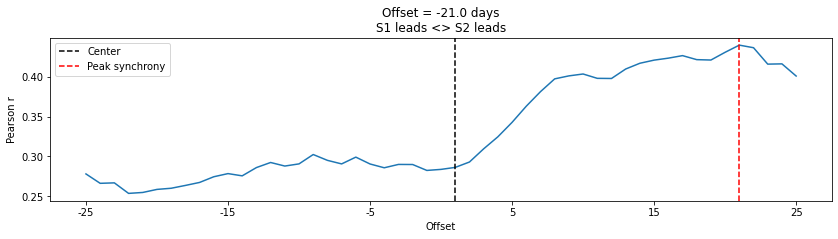

In [65]:
def crosscorr(datax, datay, lag=0, wrap=False):
    if wrap:
        shiftedy = datay.shift(lag)
        shiftedy.iloc[:lag] = datay.iloc[-lag:].values
        return datax.corr(shiftedy)
    else: 
        return datax.corr(datay.shift(lag))

d1 = dc_data['trend']
d2 = dc_data['crime_count']
days = 25
rs = [crosscorr(d1,d2, lag) for lag in range(-int(days),int(days+1))]
offset = np.floor(len(rs)/2)-np.argmax(rs)
f,ax=plt.subplots(figsize=(14,3))
ax.plot(rs)
ax.axvline(np.ceil(len(rs)/2),color='k',linestyle='--',label='Center')
ax.axvline(np.argmax(rs),color='r',linestyle='--',label='Peak synchrony')
ax.set(title=f'Offset = {offset} days\nS1 leads <> S2 leads',  xlabel='Offset',ylabel='Pearson r')
ax.set_xticklabels([int(item-25) for item in ax.get_xticks()]);
plt.legend()

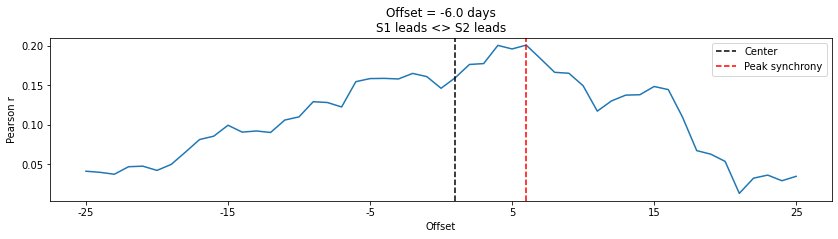

In [58]:
d1 = dc_data['311_day_till_fix']
d2 = dc_data['crime_count']
days = 25
rs = [crosscorr(d1,d2, lag) for lag in range(-int(days),int(days+1))]
offset = np.floor(len(rs)/2)-np.argmax(rs)
f,ax=plt.subplots(figsize=(14,3))
ax.plot(rs)
ax.axvline(np.ceil(len(rs)/2),color='k',linestyle='--',label='Center')
ax.axvline(np.argmax(rs),color='r',linestyle='--',label='Peak synchrony')
ax.set(title=f'Offset = {offset} days\nS1 leads <> S2 leads', xlabel='Offset',ylabel='Pearson r')
ax.set_xticklabels([int(item-25) for item in ax.get_xticks()]);
plt.legend()

In [83]:
ny_feats = 'drive/MyDrive/datathon/Copy of feature_ny.csv'
ny_data = pd.read_csv(ny_feats)

In [84]:
ny_data = ny_data[ny_data['crime_count'].notna()]

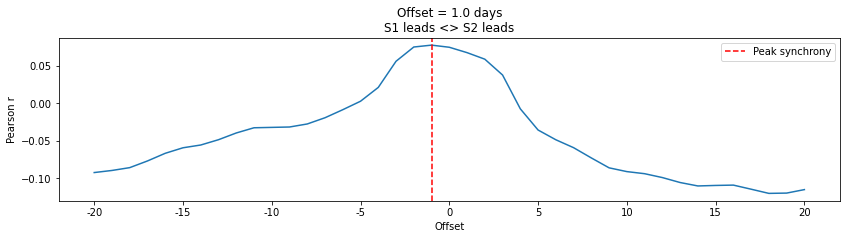

In [119]:
d1 = ny_data['trend_x']
d2 = ny_data['crime_count']
days = 20
rs = [crosscorr(d1,d2, lag) for lag in range(-int(days),int(days+1))]
offset = np.floor(len(rs)/2)-np.argmax(rs)
f,ax=plt.subplots(figsize=(14,3))
ax.plot(rs)
# ax.axvline(np.ceil(len(rs)/2),color='k',linestyle='--',label='Center')
ax.axvline(np.argmax(rs),color='r',linestyle='--',label='Peak synchrony')
ax.set(title=f'Offset = {offset} days\nS1 leads <> S2 leads', xlabel='Offset',ylabel='Pearson r')
ax.set_xticklabels([int(item-20) for item in ax.get_xticks()]);
plt.legend()

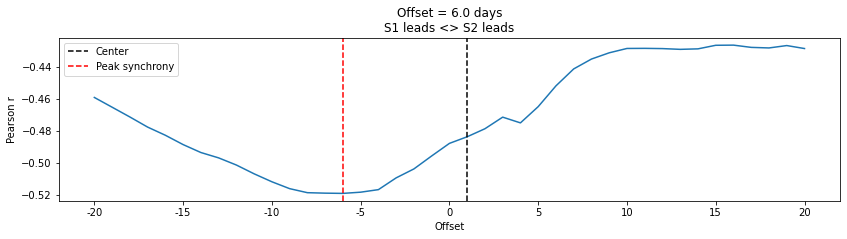

In [121]:
d1 = ny_data['trend_y']
d2 = ny_data['crime_count']
days = 20
rs = [crosscorr(d1,d2, lag) for lag in range(-int(days),int(days + 1))]
offset = np.floor(len(rs)/2)-np.argmin(rs)
f,ax=plt.subplots(figsize=(14,3))
ax.plot(rs)
ax.axvline(np.ceil(len(rs)/2),color='k',linestyle='--',label='Center')
rs_abs = [abs(x) for x in rs]
ax.axvline(np.argmax(rs_abs),color='r',linestyle='--',label='Peak synchrony')
ax.set(title=f'Offset = {offset} days\nS1 leads <> S2 leads', xlabel='Offset',ylabel='Pearson r')
ax.set_xticklabels([int(item-20) for item in ax.get_xticks()]);
plt.legend()

covid correlations

In [76]:
dc_data['POSITIVE_CASES_new'] = dc_data['POSITIVE_CASES'].diff()

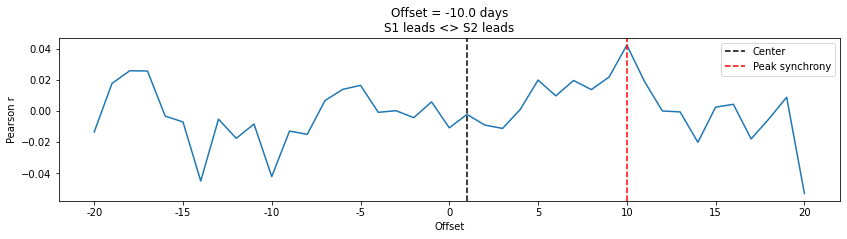

In [77]:
d1 = dc_data['trend']
d2 = dc_data['POSITIVE_CASES_new']
days = 20
rs = [crosscorr(d1,d2, lag) for lag in range(-int(days),int(days+1))]
offset = np.floor(len(rs)/2)-np.argmax(rs)
f,ax=plt.subplots(figsize=(14,3))
ax.plot(rs)
ax.axvline(np.ceil(len(rs)/2),color='k',linestyle='--',label='Center')
ax.axvline(np.argmax(rs),color='r',linestyle='--',label='Peak synchrony')
ax.set(title=f'Offset = {offset} days\nS1 leads <> S2 leads', xlabel='Offset',ylabel='Pearson r')
ax.set_xticklabels([int(item-20) for item in ax.get_xticks()]);
plt.legend()

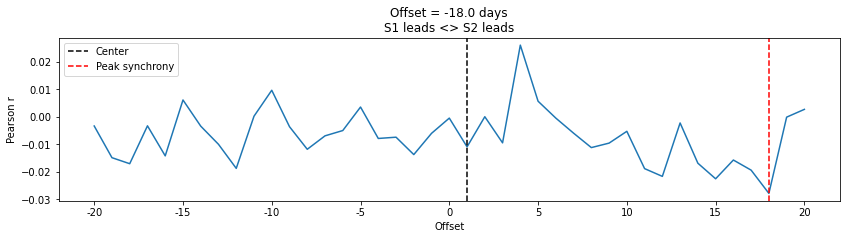

In [123]:
d1 = dc_data['311_day_till_fix']
d2 = dc_data['POSITIVE_CASES_new']
days = 20
rs = [crosscorr(d1,d2, lag) for lag in range(-int(days),int(days+1))]
offset = np.floor(len(rs)/2)-np.argmin(rs)
f,ax=plt.subplots(figsize=(14,3))
ax.plot(rs)
ax.axvline(np.ceil(len(rs)/2),color='k',linestyle='--',label='Center')
rs_abs = [abs(x) for x in rs]
ax.axvline(np.argmax(rs_abs),color='r',linestyle='--',label='Peak synchrony')
ax.set(title=f'Offset = {offset} days\nS1 leads <> S2 leads', xlabel='Offset',ylabel='Pearson r')
ax.set_xticklabels([int(item-20) for item in ax.get_xticks()]);
plt.legend()

In [79]:
dc_data['LIVES_LOST_new'] = dc_data['LIVES_LOST'].diff()

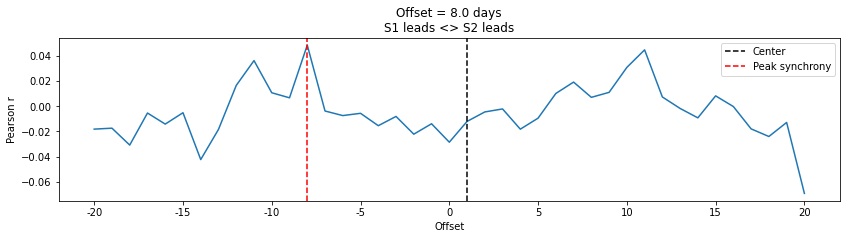

In [80]:
d1 = dc_data['trend']
d2 = dc_data['LIVES_LOST_new']
days = 20
rs = [crosscorr(d1,d2, lag) for lag in range(-int(days),int(days+1))]
offset = np.floor(len(rs)/2)-np.argmax(rs)
f,ax=plt.subplots(figsize=(14,3))
ax.plot(rs)
ax.axvline(np.ceil(len(rs)/2),color='k',linestyle='--',label='Center')
ax.axvline(np.argmax(rs),color='r',linestyle='--',label='Peak synchrony')
ax.set(title=f'Offset = {offset} days\nS1 leads <> S2 leads', xlabel='Offset',ylabel='Pearson r')
ax.set_xticklabels([int(item-20) for item in ax.get_xticks()]);
plt.legend()

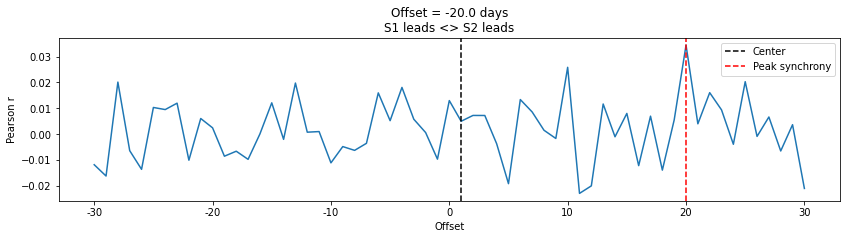

In [110]:
d1 = dc_data['311_day_till_fix']
d2 = dc_data['LIVES_LOST_new']
days = 30
rs = [crosscorr(d1,d2, lag) for lag in range(-int(days),int(days+1))]
offset = np.floor(len(rs)/2)-np.argmax(rs)
f,ax=plt.subplots(figsize=(14,3))
ax.plot(rs)
ax.axvline(np.ceil(len(rs)/2),color='k',linestyle='--',label='Center')
ax.axvline(np.argmax(rs),color='r',linestyle='--',label='Peak synchrony')
ax.set(title=f'Offset = {offset} days\nS1 leads <> S2 leads', xlabel='Offset',ylabel='Pearson r')
ax.set_xticklabels([int(item-30) for item in ax.get_xticks()]);
plt.legend()

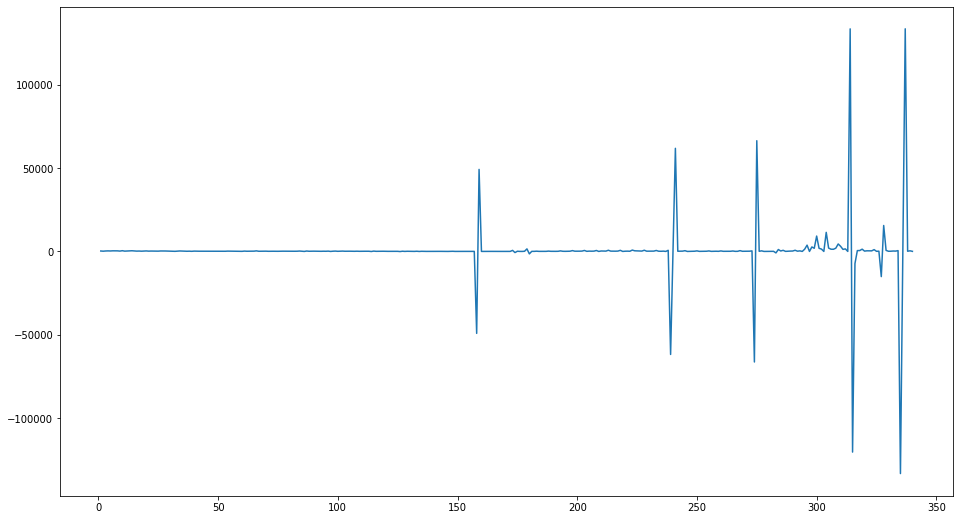

In [107]:
dc_data['POSITIVE_CASES_new'].plot()

In [87]:
ny_restime = 'drive/MyDrive/datathon/Copy of ny_trend.csv'
ny_res = pd.read_csv(ny_restime)

In [90]:
ny_data = pd.merge(ny_data, ny_res, right_on = "day", left_on = "day")

In [92]:
ny_data = ny_data[ny_data['trend_y'].notna()]

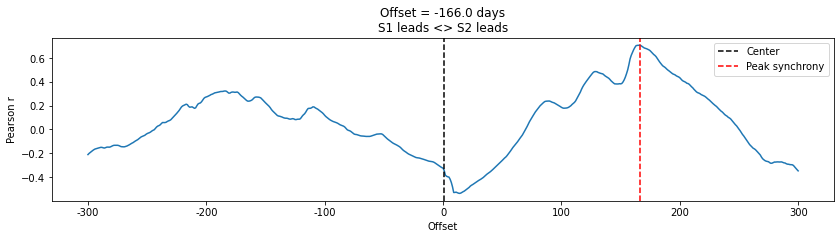

In [111]:
d1 = ny_data['trend_x']
d2 = ny_data['CASE_COUNT']
days = 300
rs = [crosscorr(d1,d2, lag) for lag in range(-int(days),int(days+1))]
offset = np.floor(len(rs)/2)-np.argmax(rs)
f,ax=plt.subplots(figsize=(14,3))
ax.plot(rs)
ax.axvline(np.ceil(len(rs)/2),color='k',linestyle='--',label='Center')
rs_abs = [abs(x) for x in rs]
ax.axvline(np.argmax(rs_abs),color='r',linestyle='--',label='Peak synchrony')
ax.set(title=f'Offset = {offset} days\nS1 leads <> S2 leads', xlabel='Offset',ylabel='Pearson r')
ax.set_xticklabels([int(item-300) for item in ax.get_xticks()]);
plt.legend()

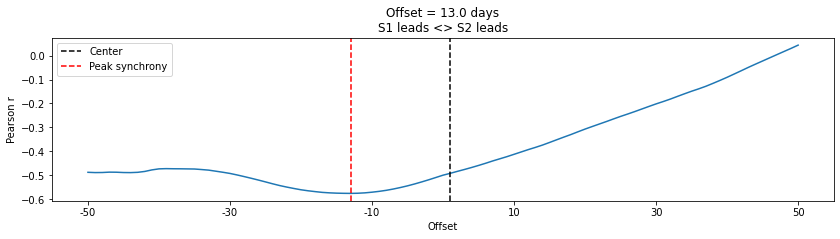

In [113]:
d1 = ny_data['trend_x']
d2 = ny_data['DEATH_COUNT']
days = 50
rs = [crosscorr(d1,d2, lag) for lag in range(-int(days),int(days+1))]
offset = np.floor(len(rs)/2)-np.argmin(rs)
f,ax=plt.subplots(figsize=(14,3))
ax.plot(rs)
ax.axvline(np.ceil(len(rs)/2),color='k',linestyle='--',label='Center')
rs_abs = [abs(x) for x in rs]
ax.axvline(np.argmax(rs_abs),color='r',linestyle='--',label='Peak synchrony')
ax.set(title=f'Offset = {offset} days\nS1 leads <> S2 leads', xlabel='Offset',ylabel='Pearson r')
ax.set_xticklabels([int(item-50) for item in ax.get_xticks()]);
plt.legend()

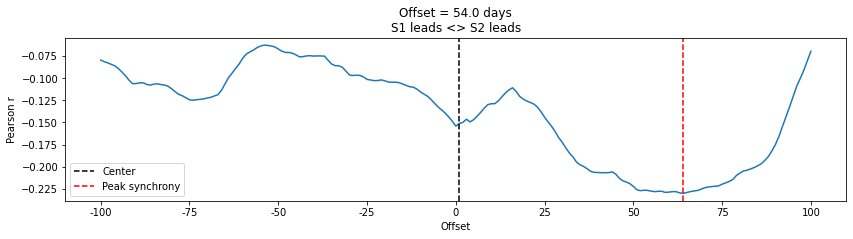

In [115]:
d1 = ny_data['trend_y']
d2 = ny_data['CASE_COUNT']
days = 100
rs = [crosscorr(d1,d2, lag) for lag in range(-int(days),int(days+1))]
offset = np.floor(len(rs)/2)-np.argmax(rs)
f,ax=plt.subplots(figsize=(14,3))
ax.plot(rs)
ax.axvline(np.ceil(len(rs)/2),color='k',linestyle='--',label='Center')
rs_abs = [abs(x) for x in rs]
ax.axvline(np.argmax(rs_abs),color='r',linestyle='--',label='Peak synchrony')
ax.set(title=f'Offset = {offset} days\nS1 leads <> S2 leads', xlabel='Offset',ylabel='Pearson r')
ax.set_xticklabels([int(item-100) for item in ax.get_xticks()]);
plt.legend()

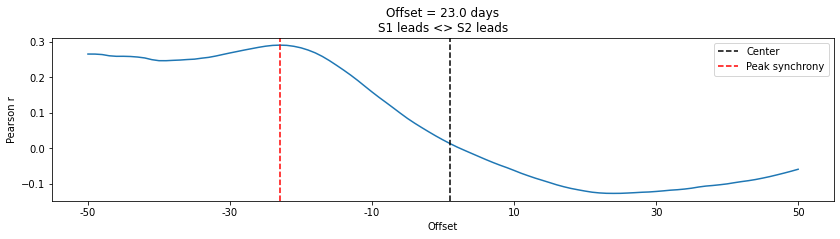

In [116]:
d1 = ny_data['trend_y']
d2 = ny_data['DEATH_COUNT']
days = 50
rs = [crosscorr(d1,d2, lag) for lag in range(-int(days),int(days+1))]
offset = np.floor(len(rs)/2)-np.argmax(rs)
f,ax=plt.subplots(figsize=(14,3))
ax.plot(rs)
ax.axvline(np.ceil(len(rs)/2),color='k',linestyle='--',label='Center')
rs_abs = [abs(x) for x in rs]
ax.axvline(np.argmax(rs_abs),color='r',linestyle='--',label='Peak synchrony')
ax.set(title=f'Offset = {offset} days\nS1 leads <> S2 leads', xlabel='Offset',ylabel='Pearson r')
ax.set_xticklabels([int(item-50) for item in ax.get_xticks()]);
plt.legend()